In [1]:
from matplotlib import pyplot as plt
from episuite.mobility import facebook

### Available countries and regions
The first API we will use here is to check the countries and regions available in the dataset.

In [2]:
client = facebook.FacebookSymptomSurvey()

In [3]:
country_region = client.get_survey_country_region()

In [4]:
country_region.head(8)

,country,region
0,Afghanistan,Kabul
1,Albania,Tiranë
2,Algeria,Alger
3,Angola,Luanda
4,Argentina,Buenos Aires
5,Argentina,Chaco
6,Argentina,Chubut
7,Argentina,Ciudad Autónoma de Buenos Aires


In [5]:
# Lets filter for some states in Brazil
brazil_regions = country_region.query("country == 'Brazil'")

In [6]:
brazil_regions.tail(8)

,country,region
72,Brazil,Rio Grande do Norte
73,Brazil,Rio Grande do Sul
74,Brazil,Rondônia
75,Brazil,Roraima
76,Brazil,Santa Catarina
77,Brazil,São Paulo
78,Brazil,Sergipe
79,Brazil,Tocantins


### Survey dates available
The next API is to get the dates available for a region.

In [7]:
result = client.get_survey_date_avail("Brazil", "Rio Grande do Sul")

In [8]:
result.tail()

,country,region,survey_date
317,Brazil,Rio Grande do Sul,20210314
318,Brazil,Rio Grande do Sul,20210315
319,Brazil,Rio Grande do Sul,20210316
320,Brazil,Rio Grande do Sul,20210317
321,Brazil,Rio Grande do Sul,20210318


We can see above the last available dates from the symptom survey.

### Fetching survey results
Let's fetch now some results from a date range.

In [9]:
result = client.get_survey_range("Brazil", "Rio Grande do Sul",
                                 "20210101", "20210318")

In [10]:
result.tail()

,percent_cli,cli_se,percent_cli_unw,cli_se_unw,sample_size,country,region,iso_code,gid_0,gid_1,survey_date,percent_cli_95_upper_ci,percent_cli_95_lower_ci
72,0.019237,0.004535,0.019466,0.003710,1387.0,Brazil,Rio Grande do Sul,BRA,BRA,BRA.21_1,2021-03-14,2.812560,1.034840
73,0.008725,0.003102,0.009072,0.002505,1433.0,Brazil,Rio Grande do Sul,BRA,BRA,BRA.21_1,2021-03-15,1.480492,0.264508
74,0.020394,0.004812,0.015957,0.003231,1504.0,Brazil,Rio Grande do Sul,BRA,BRA,BRA.21_1,2021-03-16,2.982552,1.096248
75,0.011194,0.003523,0.010519,0.002702,1426.0,Brazil,Rio Grande do Sul,BRA,BRA,BRA.21_1,2021-03-17,1.809908,0.428892
76,0.011310,0.003556,0.012354,0.002894,1457.0,Brazil,Rio Grande do Sul,BRA,BRA,BRA.21_1,2021-03-18,1.827976,0.434024


### Visualization

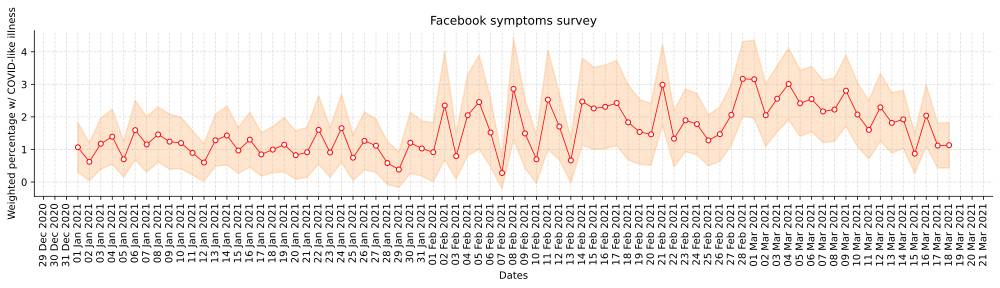

In [11]:
fig = plt.figure(figsize=(14, 4))
client.plot_region_percent_cli(result, locator="day")
plt.show()

We can see here the jump in the weighted percentage of COVID-like illness in Rio Grande do Sul/Brazil coinciding with a surge of hospitalizations that happened after February. We can also see the slow decay at the end, a good evidence of less people getting sick at home.